#**PROYECCIÓN DE VENTAS DE PRODUCTOS ALIMENTARIOS**

OBJETIVO:
Analizar las propiedades de los productos que tiene la tienda en los distintos establecimientos para ver cuales cumplen un rol fundamental para el aumento de las ventas.




# **1. Cargamos la data**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
data = '/content/drive/MyDrive/BOOTCAMP_CODING_DOJO/CARPETA_PROYECTO/sales_predictions.csv'
df = pd.read_csv(data)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


#**2. Limpieza de datos**


1.   Se verifica duplicados
2.   Se verifica nulos



In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


No hay duplicados

In [5]:
df.duplicated().sum()

0

# **2.1 Verificando los nulos**



Vemos que hay dos columna que tienen valores nulos, entre ellos son Item_Weight (peso del producto) y Outlet_Size (tamañano de la tienda en cuanto a la superficie)

In [6]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [7]:
df.head(20)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [8]:
df['Outlet_Identifier'].unique()

array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

In [9]:
df[df['Item_Weight'].isna()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362
...,...,...,...,...,...,...,...,...,...,...,...,...
8485,DRK37,NaN,Low Fat,0.043792,Soft Drinks,189.0530,OUT027,1985,Medium,Tier 3,Supermarket Type3,6261.8490
8487,DRG13,NaN,Low Fat,0.037006,Soft Drinks,164.7526,OUT027,1985,Medium,Tier 3,Supermarket Type3,4111.3150
8488,NCN14,NaN,Low Fat,0.091473,Others,184.6608,OUT027,1985,Medium,Tier 3,Supermarket Type3,2756.4120
8490,FDU44,NaN,Regular,0.102296,Fruits and Vegetables,162.3552,OUT019,1985,Small,Tier 1,Grocery Store,487.3656


In [10]:
df['Item_Weight'].value_counts().sort_index()

Item_Weight
4.555      4
4.590      5
4.610      7
4.615      4
4.635      5
          ..
21.000     6
21.100    17
21.200     5
21.250    24
21.350     7
Name: count, Length: 415, dtype: int64

In [11]:
df['Item_Identifier'].value_counts()

Item_Identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: count, Length: 1559, dtype: int64

Viendo los datos faltantes y si hay alguna relación, por lo que vemos cada id del identificador todos tiene el mismo peso, por lo que rellenaremos cada nulo con la moda dependiendo de la columna Item_Identifier y el peso.

In [12]:
df[df['Item_Identifier']=='FDP10']

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
585,FDP10,19.0,Low Fat,0.128066,Snack Foods,104.3622,OUT035,2004,Small,Tier 2,Supermarket Type1,1905.5196
2623,FDP10,19.0,Low Fat,0.128815,Snack Foods,107.6622,OUT017,2007,NaN,Tier 2,Supermarket Type1,1164.4842
3382,FDP10,19.0,Low Fat,0.128289,Snack Foods,104.9622,OUT049,1999,Medium,Tier 1,Supermarket Type1,1164.4842
4585,FDP10,19.0,Low Fat,0.128090,Snack Foods,107.0622,OUT046,1997,Small,Tier 1,Supermarket Type1,1376.2086
6087,FDP10,19.0,Low Fat,0.128350,Snack Foods,106.5622,OUT045,2002,NaN,Tier 2,Supermarket Type1,1482.0708
7883,FDP10,19.0,Low Fat,0.127984,Snack Foods,107.6622,OUT013,1987,High,Tier 3,Supermarket Type1,1270.3464


In [13]:
df.groupby(['Item_Identifier'])[['Item_Weight']].mean().reset_index()

,Item_Identifier,Item_Weight
0,DRA12,11.600
1,DRA24,19.350
2,DRA59,8.270
3,DRB01,7.390
4,DRB13,6.115
...,...,...
1554,NCZ30,6.590
1555,NCZ41,19.850
1556,NCZ42,10.500
1557,NCZ53,9.600


In [14]:
df[df['Item_Identifier']=='FDP10']

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
585,FDP10,19.0,Low Fat,0.128066,Snack Foods,104.3622,OUT035,2004,Small,Tier 2,Supermarket Type1,1905.5196
2623,FDP10,19.0,Low Fat,0.128815,Snack Foods,107.6622,OUT017,2007,NaN,Tier 2,Supermarket Type1,1164.4842
3382,FDP10,19.0,Low Fat,0.128289,Snack Foods,104.9622,OUT049,1999,Medium,Tier 1,Supermarket Type1,1164.4842
4585,FDP10,19.0,Low Fat,0.128090,Snack Foods,107.0622,OUT046,1997,Small,Tier 1,Supermarket Type1,1376.2086
6087,FDP10,19.0,Low Fat,0.128350,Snack Foods,106.5622,OUT045,2002,NaN,Tier 2,Supermarket Type1,1482.0708
7883,FDP10,19.0,Low Fat,0.127984,Snack Foods,107.6622,OUT013,1987,High,Tier 3,Supermarket Type1,1270.3464


Se calculara el valor que quiero usar de la moda para luego aplicarlo para cada fila nulo.

In [15]:
value = df.groupby('Item_Identifier')['Item_Weight'].apply(lambda x: x.mode()[0] if not x.mode().empty else np.nan)
df['Item_Weight'] = df.apply(lambda row: value[row['Item_Identifier']] if pd.isnull(row['Item_Weight']) else row['Item_Weight'], axis=1)

verificando si se completo los nulos, por lo que vemos solo queda 4 nulos.

In [16]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                     4
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [17]:
df[df['Item_Weight'].isna()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
927,FDN52,NaN,Regular,0.130933,Frozen Foods,86.9198,OUT027,1985,Medium,Tier 3,Supermarket Type3,1569.9564
1922,FDK57,NaN,Low Fat,0.079904,Snack Foods,120.0440,OUT027,1985,Medium,Tier 3,Supermarket Type3,4434.2280
4187,FDE52,NaN,Regular,0.029742,Dairy,88.9514,OUT027,1985,Medium,Tier 3,Supermarket Type3,3453.5046
5022,FDQ60,NaN,Regular,0.191501,Baking Goods,121.2098,OUT019,1985,Small,Tier 1,Grocery Store,120.5098


Vemos que son valores únicos, por lo que procederemos a borrar solo esas filas para no tener datos erróneos.

In [18]:
df[(df['Item_Identifier']=='FDQ60') & (df['Outlet_Identifier']=='OUT019')]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
5022,FDQ60,NaN,Regular,0.191501,Baking Goods,121.2098,OUT019,1985,Small,Tier 1,Grocery Store,120.5098


In [19]:
df.dropna(subset=['Item_Weight'], inplace=True)

In [20]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

# **2.2 Arreglamos los datos de la columna Item_Fat_Content**

In [21]:
df['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5088
Regular    2886
LF          316
reg         117
low fat     112
Name: count, dtype: int64

In [22]:
df = df.replace(['LF','low fat','reg'],['Low Fat','Low Fat','Regular'])
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [23]:
df['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5516
Regular    3003
Name: count, dtype: int64

# **2.3 Verificando nulos columna - Outlet_Size**

In [24]:
df['Outlet_Size'].value_counts()

Outlet_Size
Medium    2790
Small     2387
High       932
Name: count, dtype: int64

**ANÁLISIS**

verificamos los tamaños y usaremos las condiciones outlet_location_type y el outlet_type, supongo que cada grupo que pertenece a una tienda y al area donde se ubican los productos deben tener el mismo tamaño y ello lo verificare con el promedio de visibilidad que reciben por tamaño.

Tamaño : SMALL

In [25]:
df[df['Outlet_Size']=='Small']

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
11,FDA03,18.50,Regular,0.045464,Dairy,144.1102,OUT046,1997,Small,Tier 1,Supermarket Type1,2187.1530
13,FDS46,17.60,Regular,0.047257,Snack Foods,119.6782,OUT046,1997,Small,Tier 1,Supermarket Type1,2145.2076
15,FDP49,9.00,Regular,0.069089,Breakfast,56.3614,OUT046,1997,Small,Tier 1,Supermarket Type1,1547.3192
19,FDU02,13.35,Low Fat,0.102492,Dairy,230.5352,OUT035,2004,Small,Tier 2,Supermarket Type1,2748.4224
22,NCB30,14.60,Low Fat,0.025698,Household,196.5084,OUT035,2004,Small,Tier 2,Supermarket Type1,1587.2672
...,...,...,...,...,...,...,...,...,...,...,...,...
8510,FDN58,13.80,Regular,0.056862,Snack Foods,231.5984,OUT035,2004,Small,Tier 2,Supermarket Type1,7182.6504
8513,FDH31,12.00,Regular,0.020407,Meat,99.9042,OUT035,2004,Small,Tier 2,Supermarket Type1,595.2252
8517,FDF53,20.75,Regular,0.083607,Frozen Foods,178.8318,OUT046,1997,Small,Tier 1,Supermarket Type1,3608.6360
8520,NCJ29,10.60,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136


In [26]:
df[(df['Outlet_Size']=='Small')]['Outlet_Identifier'].unique()

array(['OUT046', 'OUT035', 'OUT019'], dtype=object)

In [27]:
df[df['Outlet_Size']=='Small'].mean(numeric_only=True)*100

Item_Weight                    1288.360494
Item_Visibility                   7.133318
Item_MRP                      14197.890633
Outlet_Establishment_Year    199707.792208
Item_Outlet_Sales            191289.974336
dtype: float64

In [28]:
df[df['Outlet_Size']=='Small']['Outlet_Type'].unique()

array(['Supermarket Type1', 'Grocery Store'], dtype=object)

In [29]:
df[df['Outlet_Size']=='Small']['Outlet_Location_Type'].unique()

array(['Tier 1', 'Tier 2'], dtype=object)

Tamaño Medium

In [30]:
df[df['Outlet_Size']=='Medium'].head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
7,FDP10,19.000,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636


In [31]:
df[(df['Outlet_Size']=='Medium')]['Outlet_Identifier'].unique()

array(['OUT049', 'OUT018', 'OUT027'], dtype=object)

In [32]:
df[df['Outlet_Size']=='Medium'].mean(numeric_only=True)

Item_Weight                    12.908486
Item_Visibility                 0.060120
Item_MRP                      140.635624
Outlet_Establishment_Year    1997.649462
Item_Outlet_Sales            2681.097134
dtype: float64

In [33]:
df[df['Outlet_Size']=='Medium']['Outlet_Type'].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Supermarket Type3'],
      dtype=object)

In [34]:
df[df['Outlet_Size']=='Medium']['Outlet_Location_Type'].unique()

array(['Tier 1', 'Tier 3'], dtype=object)

Tamaño : HIGH

In [35]:
df[df['Outlet_Size']=='High']

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
14,FDF32,16.350,Low Fat,0.068024,Fruits and Vegetables,196.4426,OUT013,1987,High,Tier 3,Supermarket Type1,1977.4260
20,FDN22,18.850,Regular,0.138190,Snack Foods,250.8724,OUT013,1987,High,Tier 3,Supermarket Type1,3775.0860
27,DRJ59,11.650,Low Fat,0.019356,Hard Drinks,39.1164,OUT013,1987,High,Tier 3,Supermarket Type1,308.9312
...,...,...,...,...,...,...,...,...,...,...,...,...
8462,FDQ31,5.785,Regular,0.053802,Fruits and Vegetables,85.9856,OUT013,1987,High,Tier 3,Supermarket Type1,1494.0552
8466,FDJ32,10.695,Low Fat,0.057744,Fruits and Vegetables,61.2536,OUT013,1987,High,Tier 3,Supermarket Type1,673.7896
8484,DRJ49,6.865,Low Fat,0.000000,Soft Drinks,129.9652,OUT013,1987,High,Tier 3,Supermarket Type1,2324.9736
8512,FDR26,20.700,Low Fat,0.042801,Dairy,178.3028,OUT013,1987,High,Tier 3,Supermarket Type1,2479.4392


In [36]:
df[df['Outlet_Size']=='High'].mean(numeric_only=True)*100

Item_Weight                    1300.614807
Item_Visibility                   5.995693
Item_MRP                      14142.598240
Outlet_Establishment_Year    198700.000000
Item_Outlet_Sales            229899.525558
dtype: float64

In [37]:
df[(df['Outlet_Size']=='High')]['Outlet_Identifier'].unique()

array(['OUT013'], dtype=object)

In [38]:
df[df['Outlet_Size']=='High']['Outlet_Type'].unique()

array(['Supermarket Type1'], dtype=object)

In [39]:
df[df['Outlet_Size']=='High']['Outlet_Location_Type'].unique()

array(['Tier 3'], dtype=object)

Aplicaré respecto a las condiciones para rellenar los vacios con un fillna-
para ello buscare combinaciones diferentes a los ya mencionados y sacaré la media para rellenar de acuerdo a ello.

Verifico si existen datos respecto a las condiciones que busco y efectivamente.

In [40]:
df[(df['Outlet_Type']=='Grocery Store') & (df['Outlet_Location_Type']=='Tier 3')].groupby(['Outlet_Type', 'Outlet_Location_Type']).size()

Outlet_Type    Outlet_Location_Type
Grocery Store  Tier 3                  555
dtype: int64

In [41]:
df[(df['Outlet_Type']=='Grocery Store') & (df['Outlet_Location_Type']=='Tier 3')]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
28,FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,NaN,Tier 3,Grocery Store,178.4344
30,FDV38,19.250,Low Fat,0.170349,Dairy,55.7956,OUT010,1998,NaN,Tier 3,Grocery Store,163.7868
45,FDM39,6.420,Low Fat,0.089499,Dairy,178.1002,OUT010,1998,NaN,Tier 3,Grocery Store,358.2004
65,FDC46,17.700,Low Fat,0.195068,Snack Foods,185.4266,OUT010,1998,NaN,Tier 3,Grocery Store,184.4266
...,...,...,...,...,...,...,...,...,...,...,...,...
8400,NCE07,8.180,Low Fat,0.021977,Household,140.6154,OUT010,1998,NaN,Tier 3,Grocery Store,425.4462
8432,FDI16,14.000,Regular,0.227261,Frozen Foods,54.3640,OUT010,1998,NaN,Tier 3,Grocery Store,159.7920
8473,DRI47,14.700,Low Fat,0.035016,Hard Drinks,144.3128,OUT010,1998,NaN,Tier 3,Grocery Store,431.4384
8486,FDR20,20.000,Regular,0.000000,Fruits and Vegetables,46.4744,OUT010,1998,NaN,Tier 3,Grocery Store,45.2744


In [42]:
df[(df['Outlet_Type']=='Grocery Store') & (df['Outlet_Location_Type']=='Tier 3')]['Item_Visibility'].mean(numeric_only=True)*100

10.14573552054054

In [43]:
df[(df['Outlet_Type']=='Grocery Store') & (df['Outlet_Location_Type']=='Tier 3')]['Outlet_Identifier'].unique()

array(['OUT010'], dtype=object)

In [44]:
df[(df['Outlet_Size']=='Small')]['Outlet_Identifier'].unique()

array(['OUT046', 'OUT035', 'OUT019'], dtype=object)

Como su promedio de visibilidad es alta siendo mayor que 7 y también el número de identificación de la tienda coinciden con el tamaño small se rellenará con este tamaño.

In [45]:
df.loc[(df['Outlet_Type']=='Grocery Store') & (df['Outlet_Location_Type']=='Tier 3'),'Outlet_Size'] = df.loc[(df['Outlet_Type']=='Grocery Store') & (df['Outlet_Location_Type']=='Tier 3'),'Outlet_Size'].fillna('Small')

In [46]:
df.loc[(df['Outlet_Type']=='Grocery Store') & (df['Outlet_Location_Type']=='Tier 3')]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
28,FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,Small,Tier 3,Grocery Store,178.4344
30,FDV38,19.250,Low Fat,0.170349,Dairy,55.7956,OUT010,1998,Small,Tier 3,Grocery Store,163.7868
45,FDM39,6.420,Low Fat,0.089499,Dairy,178.1002,OUT010,1998,Small,Tier 3,Grocery Store,358.2004
65,FDC46,17.700,Low Fat,0.195068,Snack Foods,185.4266,OUT010,1998,Small,Tier 3,Grocery Store,184.4266
...,...,...,...,...,...,...,...,...,...,...,...,...
8400,NCE07,8.180,Low Fat,0.021977,Household,140.6154,OUT010,1998,Small,Tier 3,Grocery Store,425.4462
8432,FDI16,14.000,Regular,0.227261,Frozen Foods,54.3640,OUT010,1998,Small,Tier 3,Grocery Store,159.7920
8473,DRI47,14.700,Low Fat,0.035016,Hard Drinks,144.3128,OUT010,1998,Small,Tier 3,Grocery Store,431.4384
8486,FDR20,20.000,Regular,0.000000,Fruits and Vegetables,46.4744,OUT010,1998,Small,Tier 3,Grocery Store,45.2744


In [47]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1855
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Buscando más pares con las condiciones mencionadas.

In [48]:
df[(df['Outlet_Type']=='Supermarket Type2') & (df['Outlet_Location_Type']=='Tier 3')]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
16,NCB42,11.800,Low Fat,0.008596,Health and Hygiene,115.3492,OUT018,2009,Medium,Tier 3,Supermarket Type2,1621.8888
31,NCS17,18.600,Low Fat,0.080829,Health and Hygiene,96.4436,OUT018,2009,Medium,Tier 3,Supermarket Type2,2741.7644
32,FDP33,18.700,Low Fat,0.000000,Snack Foods,256.6672,OUT018,2009,Medium,Tier 3,Supermarket Type2,3068.0064
...,...,...,...,...,...,...,...,...,...,...,...,...
8506,DRF37,17.250,Low Fat,0.084676,Soft Drinks,263.1910,OUT018,2009,Medium,Tier 3,Supermarket Type2,3944.8650
8511,FDF05,17.500,Low Fat,0.026980,Frozen Foods,262.5910,OUT018,2009,Medium,Tier 3,Supermarket Type2,4207.8560
8515,FDH24,20.700,Low Fat,0.021518,Baking Goods,157.5288,OUT018,2009,Medium,Tier 3,Supermarket Type2,1571.2880
8516,NCJ19,18.600,Low Fat,0.118661,Others,58.7588,OUT018,2009,Medium,Tier 3,Supermarket Type2,858.8820


En este par encontramos nulos dentro de 3 años, 2002, 2004 y 2007, verificó cada año.

In [49]:
df[(df['Outlet_Type']=='Supermarket Type1') & (df['Outlet_Location_Type']=='Tier 2')]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8,FDH17,16.20,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.20,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
19,FDU02,13.35,Low Fat,0.102492,Dairy,230.5352,OUT035,2004,Small,Tier 2,Supermarket Type1,2748.4224
22,NCB30,14.60,Low Fat,0.025698,Household,196.5084,OUT035,2004,Small,Tier 2,Supermarket Type1,1587.2672
25,NCD06,13.00,Low Fat,0.099887,Household,45.9060,OUT017,2007,NaN,Tier 2,Supermarket Type1,838.9080
...,...,...,...,...,...,...,...,...,...,...,...,...
8510,FDN58,13.80,Regular,0.056862,Snack Foods,231.5984,OUT035,2004,Small,Tier 2,Supermarket Type1,7182.6504
8513,FDH31,12.00,Regular,0.020407,Meat,99.9042,OUT035,2004,Small,Tier 2,Supermarket Type1,595.2252
8514,FDA01,15.00,Regular,0.054489,Canned,57.5904,OUT045,2002,NaN,Tier 2,Supermarket Type1,468.7232
8519,FDS36,8.38,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850


In [50]:
df[(df['Outlet_Type']=='Supermarket Type1') & (df['Outlet_Location_Type']=='Tier 2')]['Outlet_Establishment_Year'].unique()

array([2002, 2007, 2004])

1. Para el año 2002 verifico que hay 929 nulos, los cuales rellenaré con el promedio de las visibilidades y viendo el tipo de tienda.

In [51]:
df[(df['Outlet_Type']=='Supermarket Type1') & (df['Outlet_Location_Type']=='Tier 2') & (df['Outlet_Establishment_Year']== 2002)]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
33,FDO23,17.850,Low Fat,0.000000,Breads,93.1436,OUT045,2002,NaN,Tier 2,Supermarket Type1,2174.5028
46,NCP05,19.600,Low Fat,0.000000,Health and Hygiene,153.3024,OUT045,2002,NaN,Tier 2,Supermarket Type1,2428.8384
47,FDV49,10.000,Low Fat,0.025880,Canned,265.2226,OUT045,2002,NaN,Tier 2,Supermarket Type1,5815.0972
56,NCX54,9.195,Low Fat,0.048157,Household,106.1622,OUT045,2002,NaN,Tier 2,Supermarket Type1,2117.2440
...,...,...,...,...,...,...,...,...,...,...,...,...
8483,DRI11,8.260,Low Fat,0.034474,Hard Drinks,117.0834,OUT045,2002,NaN,Tier 2,Supermarket Type1,1612.5676
8502,NCH43,8.420,Low Fat,0.070712,Household,216.4192,OUT045,2002,NaN,Tier 2,Supermarket Type1,3020.0688
8508,FDW31,11.350,Regular,0.043246,Fruits and Vegetables,199.4742,OUT045,2002,NaN,Tier 2,Supermarket Type1,2587.9646
8514,FDA01,15.000,Regular,0.054489,Canned,57.5904,OUT045,2002,NaN,Tier 2,Supermarket Type1,468.7232


In [52]:
df[(df['Outlet_Type']=='Supermarket Type1') & (df['Outlet_Location_Type']=='Tier 2') & (df['Outlet_Establishment_Year']== 2002)].isna().sum()

Item_Identifier                0
Item_Weight                    0
Item_Fat_Content               0
Item_Visibility                0
Item_Type                      0
Item_MRP                       0
Outlet_Identifier              0
Outlet_Establishment_Year      0
Outlet_Size                  929
Outlet_Location_Type           0
Outlet_Type                    0
Item_Outlet_Sales              0
dtype: int64

In [53]:
df[(df['Outlet_Type']=='Supermarket Type1') & (df['Outlet_Location_Type']=='Tier 2') & (df['Outlet_Establishment_Year']== 2002)]['Item_Visibility'].mean(numeric_only=True)*100

6.0474466806243266

In [54]:
df[(df['Outlet_Type']=='Supermarket Type1') & (df['Outlet_Location_Type']=='Tier 2') & (df['Outlet_Establishment_Year']== 2002)]['Outlet_Identifier'].unique()

array(['OUT045'], dtype=object)

In [55]:
df[(df['Outlet_Size']=='Medium')]['Outlet_Identifier'].unique()

array(['OUT049', 'OUT018', 'OUT027'], dtype=object)

Como se encuentra en un porcentaje de 6,04% de visibilidad, así como el tamaño de la tienda donde se encuentra y como el id coincide con el tamaño medium, supondremos que es el tamaño medio.

In [56]:
df.loc[(df['Outlet_Type']=='Supermarket Type1') & (df['Outlet_Location_Type']=='Tier 2') & (df['Outlet_Establishment_Year']== 2002), 'Outlet_Size'] = df.loc[(df['Outlet_Type']=='Supermarket Type1') & (df['Outlet_Location_Type']=='Tier 2') & (df['Outlet_Establishment_Year']== 2002), 'Outlet_Size'].fillna('Medium')


In [57]:
df[(df['Outlet_Type']=='Supermarket Type1') & (df['Outlet_Location_Type']=='Tier 2') & (df['Outlet_Establishment_Year']== 2002)]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,Medium,Tier 2,Supermarket Type1,1076.5986
33,FDO23,17.850,Low Fat,0.000000,Breads,93.1436,OUT045,2002,Medium,Tier 2,Supermarket Type1,2174.5028
46,NCP05,19.600,Low Fat,0.000000,Health and Hygiene,153.3024,OUT045,2002,Medium,Tier 2,Supermarket Type1,2428.8384
47,FDV49,10.000,Low Fat,0.025880,Canned,265.2226,OUT045,2002,Medium,Tier 2,Supermarket Type1,5815.0972
56,NCX54,9.195,Low Fat,0.048157,Household,106.1622,OUT045,2002,Medium,Tier 2,Supermarket Type1,2117.2440
...,...,...,...,...,...,...,...,...,...,...,...,...
8483,DRI11,8.260,Low Fat,0.034474,Hard Drinks,117.0834,OUT045,2002,Medium,Tier 2,Supermarket Type1,1612.5676
8502,NCH43,8.420,Low Fat,0.070712,Household,216.4192,OUT045,2002,Medium,Tier 2,Supermarket Type1,3020.0688
8508,FDW31,11.350,Regular,0.043246,Fruits and Vegetables,199.4742,OUT045,2002,Medium,Tier 2,Supermarket Type1,2587.9646
8514,FDA01,15.000,Regular,0.054489,Canned,57.5904,OUT045,2002,Medium,Tier 2,Supermarket Type1,468.7232


In [58]:
df[(df['Outlet_Type']=='Supermarket Type1') & (df['Outlet_Location_Type']=='Tier 2') & (df['Outlet_Establishment_Year']== 2002)].isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

2. Verifico que para el año 2004 no hay nulos en la columna.

In [59]:
df[(df['Outlet_Type']=='Supermarket Type1') & (df['Outlet_Location_Type']=='Tier 2') & (df['Outlet_Establishment_Year']== 2004)]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
19,FDU02,13.350,Low Fat,0.102492,Dairy,230.5352,OUT035,2004,Small,Tier 2,Supermarket Type1,2748.4224
22,NCB30,14.600,Low Fat,0.025698,Household,196.5084,OUT035,2004,Small,Tier 2,Supermarket Type1,1587.2672
26,FDV10,7.645,Regular,0.066693,Snack Foods,42.3112,OUT035,2004,Small,Tier 2,Supermarket Type1,1065.2800
66,FDH19,19.350,Low Fat,0.033082,Meat,172.5738,OUT035,2004,Small,Tier 2,Supermarket Type1,4865.6664
86,FDZ55,6.055,Low Fat,0.025404,Fruits and Vegetables,160.9920,OUT035,2004,Small,Tier 2,Supermarket Type1,2716.4640
...,...,...,...,...,...,...,...,...,...,...,...,...
8503,FDQ44,20.500,Low Fat,0.036133,Fruits and Vegetables,120.1756,OUT035,2004,Small,Tier 2,Supermarket Type1,3392.9168
8507,FDN28,5.880,Regular,0.030242,Frozen Foods,101.7990,OUT035,2004,Small,Tier 2,Supermarket Type1,515.9950
8510,FDN58,13.800,Regular,0.056862,Snack Foods,231.5984,OUT035,2004,Small,Tier 2,Supermarket Type1,7182.6504
8513,FDH31,12.000,Regular,0.020407,Meat,99.9042,OUT035,2004,Small,Tier 2,Supermarket Type1,595.2252


In [60]:
df[(df['Outlet_Type']=='Supermarket Type1') & (df['Outlet_Location_Type']=='Tier 2') & (df['Outlet_Establishment_Year']== 2004)].isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

3. Calculando los nulos para el año 2007, verifico que hay 926 nulos, lo calculo con la visibilidad de los productos y el tipo de tienda la cual es un supermarket, así que supongo que el tamaño de la tienda es mediano.

In [61]:
df[(df['Outlet_Type']=='Supermarket Type1') & (df['Outlet_Location_Type']=='Tier 2') & (df['Outlet_Establishment_Year']== 2007)]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
25,NCD06,13.000,Low Fat,0.099887,Household,45.9060,OUT017,2007,NaN,Tier 2,Supermarket Type1,838.9080
53,FDA43,10.895,Low Fat,0.065042,Fruits and Vegetables,196.3794,OUT017,2007,NaN,Tier 2,Supermarket Type1,3121.2704
54,NCP18,12.150,Low Fat,0.028760,Household,151.4708,OUT017,2007,NaN,Tier 2,Supermarket Type1,4815.0656
73,FDG02,7.855,Low Fat,0.011325,Canned,189.6188,OUT017,2007,NaN,Tier 2,Supermarket Type1,2285.0256
...,...,...,...,...,...,...,...,...,...,...,...,...
8493,FDP21,7.420,Regular,0.025886,Snack Foods,189.1872,OUT017,2007,NaN,Tier 2,Supermarket Type1,4727.1800
8494,NCI54,15.200,Low Fat,0.000000,Household,110.4912,OUT017,2007,NaN,Tier 2,Supermarket Type1,1637.8680
8496,FDJ57,7.420,Regular,0.021696,Seafood,185.3582,OUT017,2007,NaN,Tier 2,Supermarket Type1,3715.1640
8500,NCQ42,20.350,Low Fat,0.000000,Household,125.1678,OUT017,2007,NaN,Tier 2,Supermarket Type1,1907.5170


In [62]:
df[(df['Outlet_Type']=='Supermarket Type1') & (df['Outlet_Location_Type']=='Tier 2') & (df['Outlet_Establishment_Year']== 2007)].info()

<class 'pandas.core.frame.DataFrame'>
Index: 926 entries, 9 to 8501
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            926 non-null    object 
 1   Item_Weight                926 non-null    float64
 2   Item_Fat_Content           926 non-null    object 
 3   Item_Visibility            926 non-null    float64
 4   Item_Type                  926 non-null    object 
 5   Item_MRP                   926 non-null    float64
 6   Outlet_Identifier          926 non-null    object 
 7   Outlet_Establishment_Year  926 non-null    int64  
 8   Outlet_Size                0 non-null      object 
 9   Outlet_Location_Type       926 non-null    object 
 10  Outlet_Type                926 non-null    object 
 11  Item_Outlet_Sales          926 non-null    float64
dtypes: float64(4), int64(1), object(7)
memory usage: 94.0+ KB


In [63]:
df[(df['Outlet_Type']=='Supermarket Type1') & (df['Outlet_Location_Type']=='Tier 2') & (df['Outlet_Establishment_Year']== 2007)].isna().sum()

Item_Identifier                0
Item_Weight                    0
Item_Fat_Content               0
Item_Visibility                0
Item_Type                      0
Item_MRP                       0
Outlet_Identifier              0
Outlet_Establishment_Year      0
Outlet_Size                  926
Outlet_Location_Type           0
Outlet_Type                    0
Item_Outlet_Sales              0
dtype: int64

In [64]:
df[(df['Outlet_Type']=='Supermarket Type1') & (df['Outlet_Location_Type']=='Tier 2') & (df['Outlet_Establishment_Year']== 2007)].mean(numeric_only=True)*100

Item_Weight                    1282.666847
Item_Visibility                   6.137651
Item_MRP                      13942.111922
Outlet_Establishment_Year    200700.000000
Item_Outlet_Sales            234067.526350
dtype: float64

In [65]:
df[(df['Outlet_Type']=='Supermarket Type1') & (df['Outlet_Location_Type']=='Tier 2') & (df['Outlet_Establishment_Year']== 2007)]['Outlet_Identifier'].unique()

array(['OUT017'], dtype=object)

viendo los los id de cada tamaño de tienda, el id de este año no aparece en ninguno, así que me guío por la visibilidad y lo contrasto con el interesado preguntando el tamaño de la tienda, donde me indica que efectivamente el tamaño de la tienda es mediano(es un supuesto).

In [66]:
print(df['Outlet_Identifier'].unique())
print(df[(df['Outlet_Size']=='Small')]['Outlet_Identifier'].unique())
print(df[(df['Outlet_Size']=='Medium')]['Outlet_Identifier'].unique())
print(df[(df['Outlet_Size']=='High')]['Outlet_Identifier'].unique())

['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']
['OUT010' 'OUT046' 'OUT035' 'OUT019']
['OUT049' 'OUT018' 'OUT027' 'OUT045']
['OUT013']


In [67]:
df.loc[(df['Outlet_Type']=='Supermarket Type1') & (df['Outlet_Location_Type']=='Tier 2') & (df['Outlet_Establishment_Year']== 2007),'Outlet_Size']=df.loc[(df['Outlet_Type']=='Supermarket Type1') & (df['Outlet_Location_Type']=='Tier 2') & (df['Outlet_Establishment_Year']== 2007),'Outlet_Size'].fillna('Medium')

In [68]:
df[(df['Outlet_Type']=='Supermarket Type1') & (df['Outlet_Location_Type']=='Tier 2') & (df['Outlet_Establishment_Year']== 2007)]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,Medium,Tier 2,Supermarket Type1,4710.5350
25,NCD06,13.000,Low Fat,0.099887,Household,45.9060,OUT017,2007,Medium,Tier 2,Supermarket Type1,838.9080
53,FDA43,10.895,Low Fat,0.065042,Fruits and Vegetables,196.3794,OUT017,2007,Medium,Tier 2,Supermarket Type1,3121.2704
54,NCP18,12.150,Low Fat,0.028760,Household,151.4708,OUT017,2007,Medium,Tier 2,Supermarket Type1,4815.0656
73,FDG02,7.855,Low Fat,0.011325,Canned,189.6188,OUT017,2007,Medium,Tier 2,Supermarket Type1,2285.0256
...,...,...,...,...,...,...,...,...,...,...,...,...
8493,FDP21,7.420,Regular,0.025886,Snack Foods,189.1872,OUT017,2007,Medium,Tier 2,Supermarket Type1,4727.1800
8494,NCI54,15.200,Low Fat,0.000000,Household,110.4912,OUT017,2007,Medium,Tier 2,Supermarket Type1,1637.8680
8496,FDJ57,7.420,Regular,0.021696,Seafood,185.3582,OUT017,2007,Medium,Tier 2,Supermarket Type1,3715.1640
8500,NCQ42,20.350,Low Fat,0.000000,Household,125.1678,OUT017,2007,Medium,Tier 2,Supermarket Type1,1907.5170


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8519 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8519 non-null   object 
 1   Item_Weight                8519 non-null   float64
 2   Item_Fat_Content           8519 non-null   object 
 3   Item_Visibility            8519 non-null   float64
 4   Item_Type                  8519 non-null   object 
 5   Item_MRP                   8519 non-null   float64
 6   Outlet_Identifier          8519 non-null   object 
 7   Outlet_Establishment_Year  8519 non-null   int64  
 8   Outlet_Size                8519 non-null   object 
 9   Outlet_Location_Type       8519 non-null   object 
 10  Outlet_Type                8519 non-null   object 
 11  Item_Outlet_Sales          8519 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 865.2+ KB


Se verifica si hay nulos y efectivamente no hay.

In [70]:
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

#3.Verificamos nuevamente duplicados.

In [71]:
df.duplicated().sum()

0

# 4 Visualización de datos

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8519 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8519 non-null   object 
 1   Item_Weight                8519 non-null   float64
 2   Item_Fat_Content           8519 non-null   object 
 3   Item_Visibility            8519 non-null   float64
 4   Item_Type                  8519 non-null   object 
 5   Item_MRP                   8519 non-null   float64
 6   Outlet_Identifier          8519 non-null   object 
 7   Outlet_Establishment_Year  8519 non-null   int64  
 8   Outlet_Size                8519 non-null   object 
 9   Outlet_Location_Type       8519 non-null   object 
 10  Outlet_Type                8519 non-null   object 
 11  Item_Outlet_Sales          8519 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 865.2+ KB


In [73]:
df.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,19.000,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,Medium,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,Medium,Tier 2,Supermarket Type1,4710.5350


# 4.1 **Variables numericas**

In [74]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Item_Weight,8519.0,12.875420,4.646098,4.555,8.785000,12.650000,16.850000,21.350000
Item_Visibility,8519.0,0.066112,0.051586,0.000,0.026983,0.053925,0.094558,0.328391
Item_MRP,8519.0,141.010019,62.283594,31.290,93.844900,143.047000,185.676600,266.888400
Outlet_Establishment_Year,8519.0,1997.837892,8.369105,1985.000,1987.000000,1999.000000,2004.000000,2009.000000
Item_Outlet_Sales,8519.0,2181.188779,1706.511093,33.290,834.247400,1794.331000,3100.630600,13086.964800


Graficando las variables numéricas.

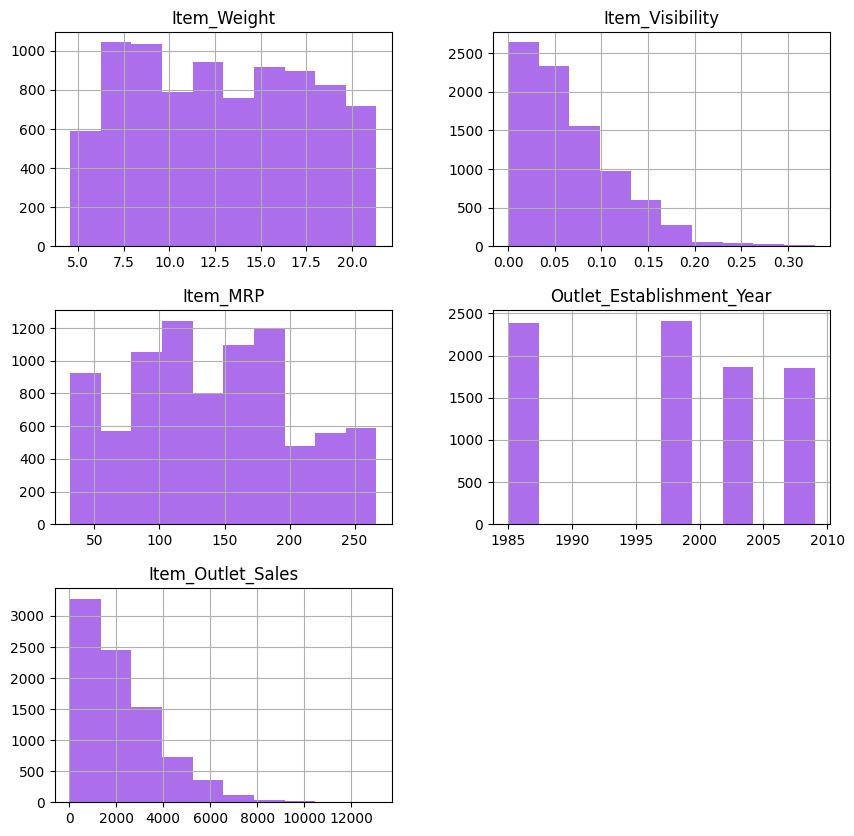

In [75]:
df.hist(figsize=(10, 10), color='#8B30E3', alpha=0.7)
plt.show()

Se visualiza cada variable numerica con su frecuencia, vemos como la visibilidad va disminuyendo, tiene 4 años bien marcados que son los años de apertura del local hasta el último que fue en el 2010, así como las ventas de salida va en caida, la cual es una variable analizar por que la disminución de esta.

#4.2 **Variables categóricas**

In [76]:
df.describe(include='O').T

,count,unique,top,freq
Item_Identifier,8519,1555,FDG33,10
Item_Fat_Content,8519,2,Low Fat,5516
Item_Type,8519,16,Fruits and Vegetables,1232
Outlet_Identifier,8519,10,OUT013,932
Outlet_Size,8519,3,Medium,4645
Outlet_Location_Type,8519,3,Tier 3,3347
Outlet_Type,8519,4,Supermarket Type1,5577


# 4.2.1 **VAR : Outlet_Identifier**

Contando el número de observaciones en cada categoría

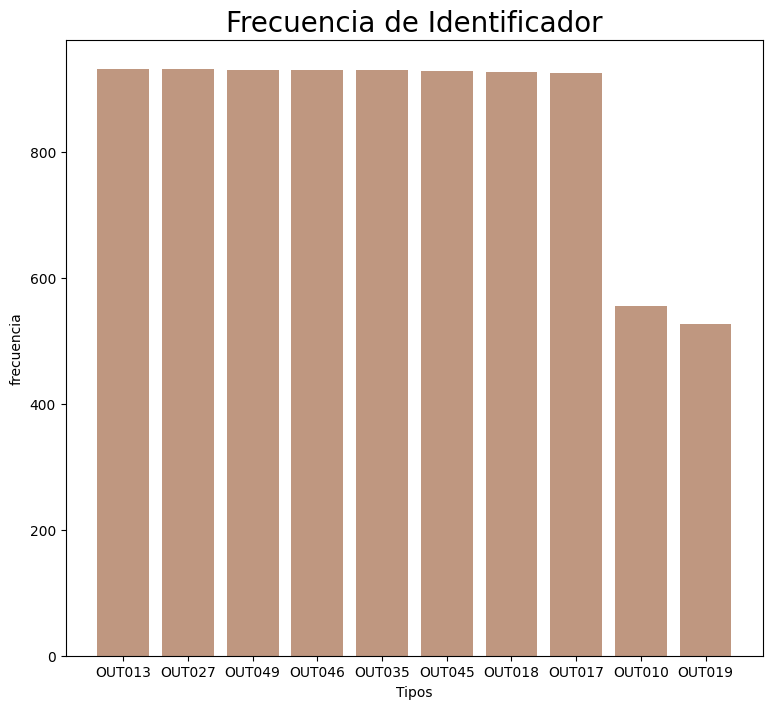

In [77]:
plt.figure(figsize=(9,8))
conteo = df['Outlet_Identifier'].value_counts()
plt.bar(conteo.index, conteo.values, color='#bf9780')
plt.title('Frecuencia de Identificador',fontsize=20 )
plt.xlabel('Tipos')
plt.ylabel('frecuencia')
plt.show()

vemos que para los diferentes tipos de productos hay un mayor pedido en estos tipos {OUT13, OUT027, OUT049, OUT046, OUT035, OUT045, OUT017} por lo que debemos saber cual es el motivo y el porque de bajos pedidos para los tipos {OUT010 y OUT019}

# 4.2.2 **VAR : Outlet_Size**

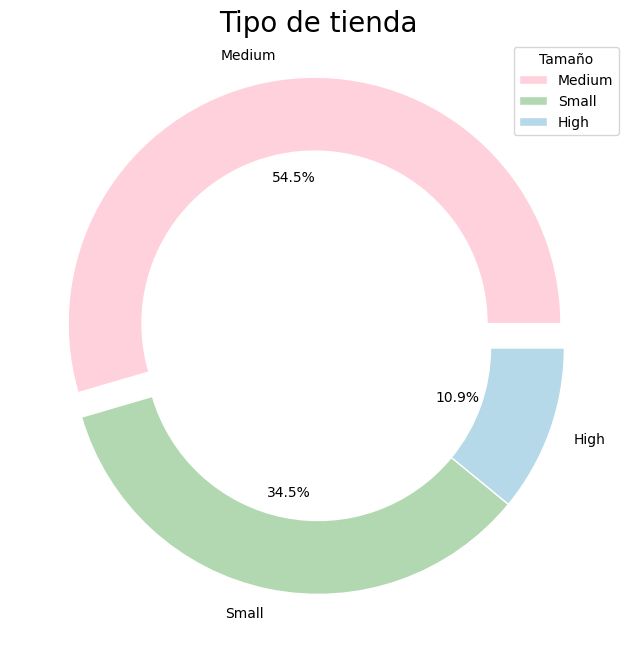

In [78]:
plt.figure(dpi = 100,figsize=(15,8))
conteo = df['Outlet_Size'].value_counts()
colores_pastel = ['#FFD1DC', '#B2D8B2', '#B5D9E8']
plt.pie(conteo.values, labels=conteo.index, autopct='%1.1f%%', colors = colores_pastel, wedgeprops=dict(width=0.3, edgecolor='w'), explode = ( 0.1, 0, 0) )
plt.title('Tipo de tienda',fontsize=20)
plt.legend(title='Tamaño')
plt.show()

Vemos que hay un mayor porcentaje de participación para la tienda mediana, le sigue la tienda pequeña y por último son las tiendas grandes.

# 4.2.2 **VAR : Outlet_Location_Type**

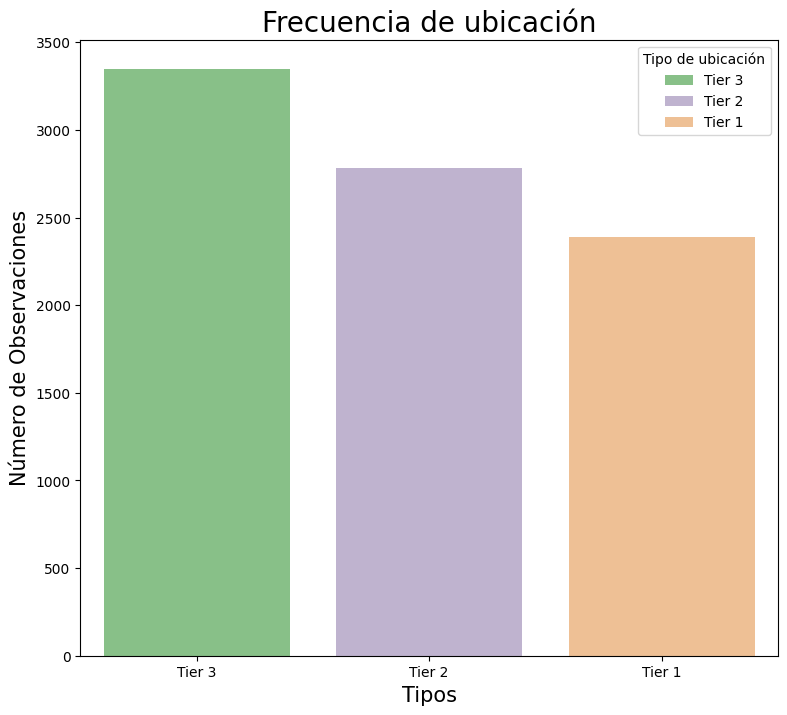

In [79]:
plt.figure(dpi = 100, figsize=(9,8))
conteo = df['Outlet_Location_Type'].value_counts()
ax = sns.barplot(x=conteo.index, y=conteo.values, hue=conteo.index, palette='Accent', legend=True)
ax.legend(title = 'Tipo de ubicación')
plt.title('Frecuencia de ubicación', fontsize=20)
plt.ylabel('Número de Observaciones', fontsize=15)
plt.xlabel('Tipos', fontsize=15)
plt.show()

Vemos en la gráfica que el tipo Tier 3 es la ubiación más concurrida, la cual debemos revisar el porque ya que esto nos ayudará que productos son vendidos ahí

# 4.2.3 **VAR : Outlet_Type**

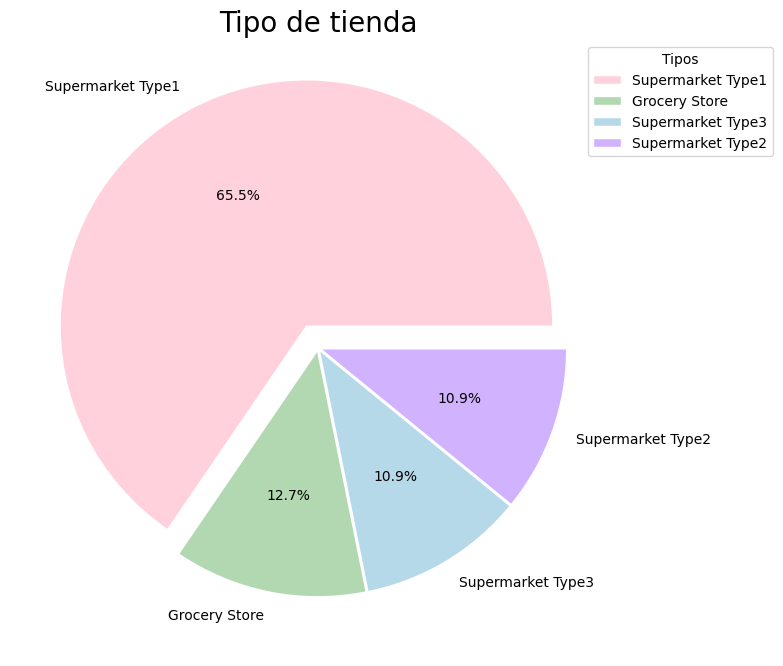

In [238]:
plt.figure(dpi = 100,figsize=(10,8))
conteo = df['Outlet_Type'].value_counts()
colores_pastel = ['#FFD1DC', '#B2D8B2', '#B5D9E8', '#D1B2FF']
plt.pie(conteo.values, labels=conteo.index, autopct='%1.1f%%',colors = colores_pastel, wedgeprops=dict(width=1, edgecolor='w'), explode = (0.1, 0.01, 0.01, 0.01) )
plt.title('Tipo de tienda',fontsize=20)
plt.legend(title='Tipos', bbox_to_anchor=(1, 0, 0.25, 1))
plt.show()

El tipo de tienda más concurrida es la Supermarket Type1.

# 4.2.4 **VAR : Item_Type**

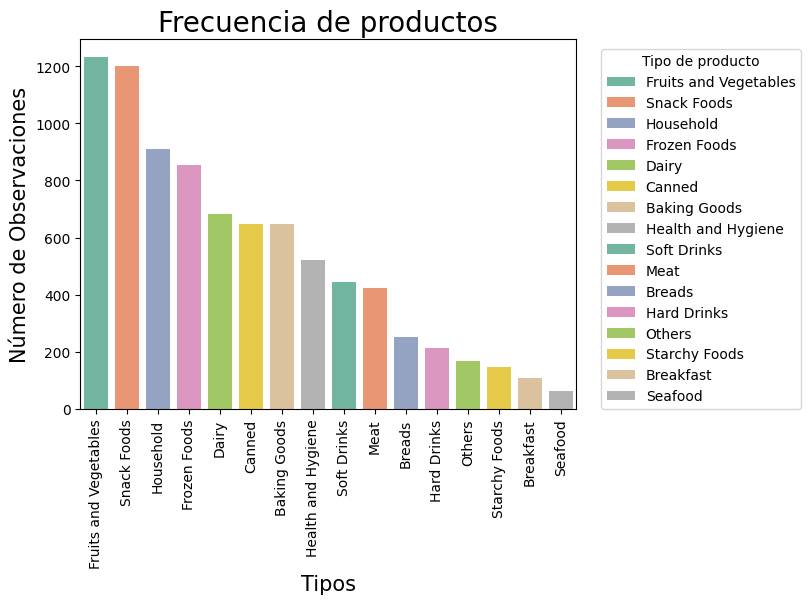

In [81]:
conteo = df['Item_Type'].value_counts()
sns.barplot(x=conteo.index , y=conteo.values, hue =conteo.index, palette='Set2', legend=True);
plt.xticks(rotation=90);
plt.legend(title = 'Tipo de producto', loc=(1.05,0))
plt.title('Frecuencia de productos', fontsize=20)
plt.ylabel('Número de Observaciones', fontsize=15)
plt.xlabel('Tipos', fontsize=15)
plt.show()

Vemos que las frutas y vegetales son los productos que mas se consumen.

# **5. Analizando los datos**

In [82]:
df3 = df.copy()
df3.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


Se filtrara por el tamaño de la tienda , el tipo de lugar y el año que se establecio la tienda para visualizar cuales fueron los productos de mayor visibilidad.

In [83]:
df3['Item_Visibility'] = round(df3['Item_Visibility']*100,2)
df3.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,1.60,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,1.93,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,1.68,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.00,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.00,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [84]:
 df3[df3['Outlet_Location_Type'] == 'Tier 3']

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
1,DRC01,5.920,Regular,1.93,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
3,FDX07,19.200,Regular,0.00,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.00,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.00,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,1.27,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
...,...,...,...,...,...,...,...,...,...,...,...,...
8512,FDR26,20.700,Low Fat,4.28,Dairy,178.3028,OUT013,1987,High,Tier 3,Supermarket Type1,2479.4392
8515,FDH24,20.700,Low Fat,2.15,Baking Goods,157.5288,OUT018,2009,Medium,Tier 3,Supermarket Type2,1571.2880
8516,NCJ19,18.600,Low Fat,11.87,Others,58.7588,OUT018,2009,Medium,Tier 3,Supermarket Type2,858.8820
8518,FDF22,6.865,Low Fat,5.68,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834


Se filtrará por el tipo de tienda, tamaño y el año establecido, para ver que productos son los más visibles.

In [85]:
df3[(df3['Outlet_Type'] == 'Supermarket Type1') & (df3['Outlet_Size']=='Medium') & (df3['Outlet_Establishment_Year']==1999)]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,1.60,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
2,FDN15,17.500,Low Fat,1.68,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
10,FDY07,11.800,Low Fat,0.00,Fruits and Vegetables,45.5402,OUT049,1999,Medium,Tier 1,Supermarket Type1,1516.0266
12,FDX32,15.100,Regular,10.00,Fruits and Vegetables,145.4786,OUT049,1999,Medium,Tier 1,Supermarket Type1,1589.2646
17,FDP49,9.000,Regular,6.92,Breakfast,54.3614,OUT049,1999,Medium,Tier 1,Supermarket Type1,718.3982
...,...,...,...,...,...,...,...,...,...,...,...,...
8451,FDK21,7.905,Low Fat,1.00,Snack Foods,249.6408,OUT049,1999,Medium,Tier 1,Supermarket Type1,3254.4304
8467,FDV31,9.800,Low Fat,0.00,Fruits and Vegetables,175.2370,OUT049,1999,Medium,Tier 1,Supermarket Type1,3881.6140
8470,FDW27,5.860,Regular,15.11,Meat,155.1314,OUT049,1999,Medium,Tier 1,Supermarket Type1,1551.3140
8475,NCS17,18.600,Low Fat,8.06,Health and Hygiene,92.5436,OUT049,1999,Medium,Tier 1,Supermarket Type1,378.1744


Filtrando año 1999

In [86]:
gb_visi = df3[(df3['Outlet_Type'] == 'Supermarket Type1') & (df3['Outlet_Size']=='Medium') & (df3['Outlet_Establishment_Year']==1999)].groupby(['Item_Type'])[['Item_Visibility']].mean().sort_values(by='Item_Visibility', ascending =True).reset_index()
gb_visi

,Item_Type,Item_Visibility
0,Health and Hygiene,4.855385
1,Others,5.447647
2,Breads,5.654800
3,Household,5.772211
4,Baking Goods,5.975303
5,Fruits and Vegetables,5.982319
6,Hard Drinks,6.086000
7,Soft Drinks,6.127826
8,Frozen Foods,6.159355
9,Dairy,6.243077


Filtrando año 2002

In [87]:
gb_visi2 = df3[(df3['Outlet_Type'] == 'Supermarket Type1') & (df3['Outlet_Size']=='Medium') & (df3['Outlet_Establishment_Year']==2002)].groupby(['Item_Type'])[['Item_Visibility']].mean().sort_values(by='Item_Visibility', ascending =True).reset_index()
gb_visi2

,Item_Type,Item_Visibility
0,Seafood,4.207778
1,Health and Hygiene,4.974000
2,Meat,5.272368
3,Soft Drinks,5.452549
4,Household,5.573131
5,Breads,5.666364
6,Dairy,5.724348
7,Others,5.743000
8,Hard Drinks,5.752857
9,Frozen Foods,6.104198


Filtrando el año 2007

In [88]:
gb_visi3 = df3[(df3['Outlet_Type'] == 'Supermarket Type1') & (df3['Outlet_Size']=='Medium') & (df3['Outlet_Establishment_Year']==2007)].groupby(['Item_Type'])[['Item_Visibility']].mean().sort_values(by='Item_Visibility', ascending =True).reset_index()
gb_visi3

,Item_Type,Item_Visibility
0,Meat,4.843864
1,Starchy Foods,5.133889
2,Household,5.323158
3,Health and Hygiene,5.327049
4,Snack Foods,5.936953
5,Frozen Foods,5.967453
6,Soft Drinks,6.114259
7,Seafood,6.148000
8,Others,6.292500
9,Baking Goods,6.424384


#5.2 Gráfica de la visibilidad en los 3 años (1999, 2002, 2007)

Unimos los 3 años para ver la relación de los productos respecto a la visibilidad.

In [89]:
fig_c = px.bar(title = 'Visibilidad de los productos a traves de los años')

fig_c.add_bar(x=gb_visi['Item_Type'], y=gb_visi['Item_Visibility'], name='1999')
fig_c.add_bar(x=gb_visi2['Item_Type'], y=gb_visi2['Item_Visibility'], name='2002')
fig_c.add_bar(x=gb_visi3['Item_Type'], y=gb_visi3['Item_Visibility'], name='2007')

fig_c.update_xaxes(title_text='Productos')
fig_c.update_yaxes(title_text='Visibilidad')
fig_c.update_layout(legend_title_text='Año')

fig_c.show()

Vemos en el gráfico que para una tienda del tamaño mediano y tipo Supermarket 1, tuvieron el foco de mayor visibilidad en los desayunos para los años que abría la tienda como son los años 1999, 2002 y 2007.  
2. Para el año 2002 los productos que mayor visibilidad presentaron son: breakfast, canned, fruits and vegetabbles, y snack foods
3. Para el año 2007 los productos como breakfast, hard drinks, breads y canned fueron los de mayor visibilidad.

# 5.3 Ventas a tráves de los últimos años mayores de 1999

In [138]:
gb_ventas1 = df3[df3['Outlet_Establishment_Year']>1999].groupby(['Outlet_Establishment_Year','Outlet_Size','Item_Type'])[['Item_Outlet_Sales']].mean().sort_index(ascending=True).reset_index()
gb_ventas1

,Outlet_Establishment_Year,Outlet_Size,Item_Type,Item_Outlet_Sales
0,2002,Medium,Baking Goods,2148.127609
1,2002,Medium,Breads,1989.813915
2,2002,Medium,Breakfast,2180.295260
3,2002,Medium,Canned,2355.510427
4,2002,Medium,Dairy,2241.304733
...,...,...,...,...
59,2009,Medium,Others,1853.620490
60,2009,Medium,Seafood,3166.639914
61,2009,Medium,Snack Foods,2111.473733
62,2009,Medium,Soft Drinks,1923.814626


In [164]:
gb_ventas2 = df3[df3['Outlet_Establishment_Year']==2002].groupby(['Outlet_Establishment_Year','Outlet_Size','Item_Type'])[['Item_Outlet_Sales']].mean().sort_index(ascending=True).reset_index()
gb_ventas3 = df3[df3['Outlet_Establishment_Year']==2004].groupby(['Outlet_Establishment_Year','Outlet_Size','Item_Type'])[['Item_Outlet_Sales']].mean().sort_index(ascending=True).reset_index()
gb_ventas4 = df3[df3['Outlet_Establishment_Year']==2007].groupby(['Outlet_Establishment_Year','Outlet_Size','Item_Type'])[['Item_Outlet_Sales']].mean().sort_index(ascending=True).reset_index()
gb_ventas5 = df3[df3['Outlet_Establishment_Year']==2009].groupby(['Outlet_Establishment_Year','Outlet_Size','Item_Type'])[['Item_Outlet_Sales']].mean().sort_index(ascending=True).reset_index()

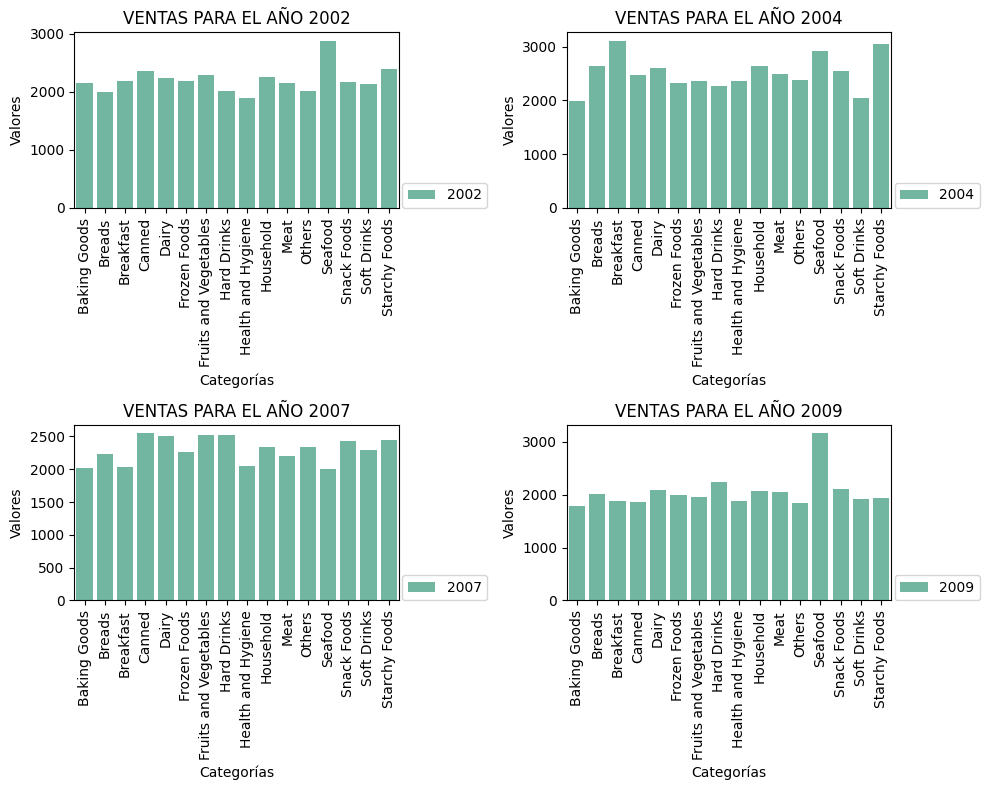

In [201]:
fig1, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

datos_subplots = [(gb_ventas2, axes[0, 0]), (gb_ventas3, axes[0, 1]), (gb_ventas4, axes[1, 0]), (gb_ventas5, axes[1, 1])]
titulos = ['VENTAS PARA EL AÑO 2002', 'VENTAS PARA EL AÑO 2004', 'VENTAS PARA EL AÑO 2007', 'VENTAS PARA EL AÑO 2009']

for i, (datos, ax) in enumerate(datos_subplots):
    sns.barplot(data=datos, x='Item_Type', y='Item_Outlet_Sales', hue='Outlet_Establishment_Year',palette='Set2', ax=ax)
    ax.set_xlabel('Categorías')
    ax.set_ylabel('Valores')
    ax.set_title(titulos[i])
    ax.tick_params(axis='x', rotation=90)
    ax.legend(loc=(1.01,-0))

plt.tight_layout()
plt.show()

Vemos:
1. Para el año 2002 : la mayor venta es para seafood seguido de strarchy foods
2. Para el año 2004 : Vemos que aumento la venta de Breakfast incluidos SeaFood y Strarchy Foods
3. Para el año 2007 : Vemos que los productos anteriores se venden pero en este caso los productos mas vendidos son: Canned, Dairy, Fruit and Vegetables y Hard Drinks.
4. Para el año 2009 : El producto mayo vendido es el SeaFood, seguido de Hard Drinks, con Snack foods y Dairy.

Conclusión:
Los productos más vendidos a lo largo de estos años han sido:
* Seafoods
* Breakfast
* Strarchy Foods
* Hard Drinks
* Canned
* Dairy
* Fruits and Vegetables





# 5.4 Ventas por productos específicos

In [234]:
gb_ventasind1 = df3[(df3['Item_Type']=='Seafood') & (df3['Outlet_Establishment_Year']>1999)].groupby(['Outlet_Establishment_Year'])[['Item_Outlet_Sales']].mean().sort_index(ascending=True).reset_index()
gb_ventasind1

,Outlet_Establishment_Year,Item_Outlet_Sales
0,2002,2880.842622
1,2004,2919.865900
2,2007,2006.588040
3,2009,3166.639914


Escogemos los 9 productos que mayores ventas tienen a lo largo de los años.


In [235]:
gb_ventasind1 = df3[(df3['Item_Type']=='Seafood') & (df3['Outlet_Establishment_Year']>1999)].groupby(['Outlet_Establishment_Year'])[['Item_Outlet_Sales']].mean().sort_index(ascending=True).reset_index()
gb_ventasind2 = df3[(df3['Item_Type']=='Breakfast') & (df3['Outlet_Establishment_Year']>1999)].groupby(['Outlet_Establishment_Year'])[['Item_Outlet_Sales']].mean().sort_index(ascending=True).reset_index()
gb_ventasind3 = df3[(df3['Item_Type']=='Starchy Foods') & (df3['Outlet_Establishment_Year']>1999)].groupby(['Outlet_Establishment_Year'])[['Item_Outlet_Sales']].mean().sort_index(ascending=True).reset_index()
gb_ventasind4 = df3[(df3['Item_Type']=='Hard Drinks') & (df3['Outlet_Establishment_Year']>1999)].groupby(['Outlet_Establishment_Year'])[['Item_Outlet_Sales']].mean().sort_index(ascending=True).reset_index()
gb_ventasind5 = df3[(df3['Item_Type']=='Canned') & (df3['Outlet_Establishment_Year']>1999)].groupby(['Outlet_Establishment_Year'])[['Item_Outlet_Sales']].mean().sort_index(ascending=True).reset_index()
gb_ventasind6 = df3[(df3['Item_Type']=='Dairy') & (df3['Outlet_Establishment_Year']>1999)].groupby(['Outlet_Establishment_Year'])[['Item_Outlet_Sales']].mean().sort_index(ascending=True).reset_index()
gb_ventasind7 = df3[(df3['Item_Type']=='Fruits and Vegetables') & (df3['Outlet_Establishment_Year']>1999)].groupby(['Outlet_Establishment_Year'])[['Item_Outlet_Sales']].mean().sort_index(ascending=True).reset_index()
gb_ventasind8 = df3[(df3['Item_Type']=='Breads') & (df3['Outlet_Establishment_Year']>1999)].groupby(['Outlet_Establishment_Year'])[['Item_Outlet_Sales']].mean().sort_index(ascending=True).reset_index()
gb_ventasind9 = df3[(df3['Item_Type']=='Household') & (df3['Outlet_Establishment_Year']>1999)].groupby(['Outlet_Establishment_Year'])[['Item_Outlet_Sales']].mean().sort_index(ascending=True).reset_index()

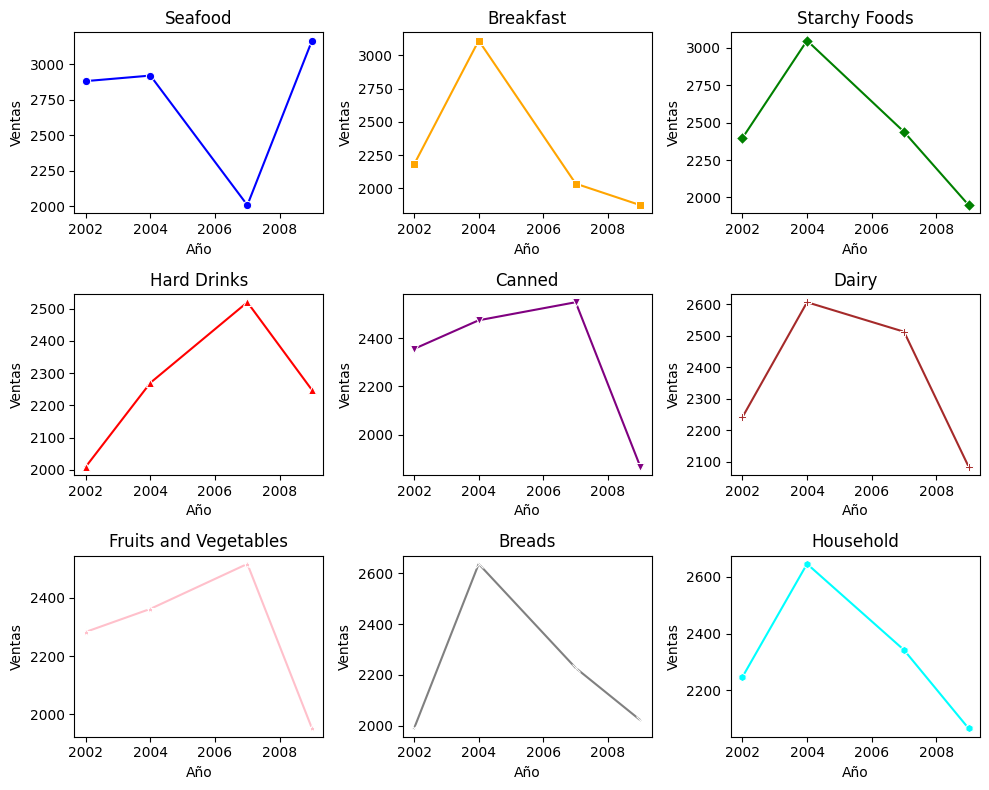

In [237]:
colores = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink','gray', 'cyan']
marcadores = ['o', 's', 'D', '^', 'v', 'P', '*','x', 'h']
fig2, axes = plt.subplots(3,3,figsize=(10,8))
datos_subplots = [(gb_ventasind1, axes[0, 0]), (gb_ventasind2, axes[0, 1]), (gb_ventasind3, axes[0, 2]),
                  (gb_ventasind4, axes[1, 0]), (gb_ventasind5, axes[1, 1]), (gb_ventasind6, axes[1, 2]),
                  (gb_ventasind7, axes[2, 0]), (gb_ventasind8, axes[2, 1]), (gb_ventasind9, axes[2, 2])]
titulos = ['Seafood','Breakfast','Starchy Foods','Hard Drinks','Canned','Dairy','Fruits and Vegetables','Breads','Household']

for i, (datos, ax) in enumerate(datos_subplots):
    sns.lineplot(data=datos, x='Outlet_Establishment_Year', y='Item_Outlet_Sales',color=colores[i], marker=marcadores[i], ax=ax)
    ax.set_xlabel('Año')
    ax.set_ylabel('Ventas')
    ax.set_title(titulos[i])
plt.tight_layout()
plt.show()

Vemos en la gráfica los productos de mayores ventas, las cuales estos representan una tendencia a la baja(la gran mayoría) con respecto a sus ventas totales.

Viendo que la venta de mariscos aumento a lo largo de los años, por lo que una recomendación es tener productos de calidad respecto a los 'breakfast'(desayunos), 'Starchy Foods','Hard Drinks','Canned','Dairy','Fruits and Vegetables','Breads','Household' para obtener mayores ventas asi como buena visibilidad respecto a otros productos tambien incluir el promocionar a los productos.